In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
zillow = pd.read_csv("pricepersqft.csv")
zillow.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974


In [3]:
zillow = zillow.T.fillna(zillow[['November 2010','December 2010','January 2011','February 2011','March 2011','April 2011','May 2011','June 2011','July 2011','August 2011',
                                             'September 2011','October 2011','November 2011','December 2011','January 2012','February 2012','March 2012','April 2012','May 2012','June 2012','July 2012','August 2012',
                                             'September 2012','October 2012','November 2012','December 2012','January 2013','February 2013','March 2013','April 2013','May 2013','June 2013','July 2013','August 2013',
                                             'September 2013','October 2013','November 2013','December 2013','January 2014','February 2014','March 2014','April 2014','May 2014','June 2014','July 2014','August 2014',
                                             'September 2014','October 2014','November 2014','December 2014','January 2015','February 2015','March 2015','April 2015','May 2015','June 2015','July 2015','August 2015',
                                             'September 2015','October 2015','November 2015','December 2015','January 2016','February 2016','March 2016','April 2016','May 2016','June 2016','July 2016','August 2016',
                                             'September 2016','October 2016','November 2016','December 2016','January 2017']].mean(axis=1)).T
zillow.head(1000)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,1.62571,1.62571,1.62571,1.62571,...,1.806,1.81,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.58,1.582,...,1.99,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.37,1.374,1.378,1.38,1.38,1.38,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.98,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,0.764,0.766,0.766,0.766,...,0.862,0.87,0.876,0.88,0.882,0.884,0.886,0.89,0.892,0.894
6,18959,Las Vegas,Las Vegas,Clark,NV,7,0.75,0.75,0.748,0.748,...,0.768,0.77,0.772,0.774,0.772,0.774,0.774,0.778,0.78,0.78
7,6915,San Antonio,San Antonio,Bexar,TX,8,0.694,0.698,0.7,0.7,...,0.82,0.822,0.824,0.822,0.822,0.822,0.824,0.83,0.834,0.836
8,54296,San Diego,San Diego,San Diego,CA,9,1.492,1.494,1.492,1.49,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,0.802,0.81,0.818,0.824,...,1.026,1.034,1.04,1.046,1.048,1.05,1.054,1.06,1.062,1.064


In [4]:
tidy = pd.melt(zillow.reset_index(),
               id_vars=['State'],value_vars =['November 2010','December 2010','January 2011','February 2011','March 2011','April 2011','May 2011','June 2011','July 2011','August 2011',
                                             'September 2011','October 2011','November 2011','December 2011','January 2012','February 2012','March 2012','April 2012','May 2012','June 2012','July 2012','August 2012',
                                             'September 2012','October 2012','November 2012','December 2012','January 2013','February 2013','March 2013','April 2013','May 2013','June 2013','July 2013','August 2013',
                                             'September 2013','October 2013','November 2013','December 2013','January 2014','February 2014','March 2014','April 2014','May 2014','June 2014','July 2014','August 2014',
                                             'September 2014','October 2014','November 2014','December 2014','January 2015','February 2015','March 2015','April 2015','May 2015','June 2015','July 2015','August 2015',
                                             'September 2015','October 2015','November 2015','December 2015','January 2016','February 2016','March 2016','April 2016','May 2016','June 2016','July 2016','August 2016',
                                             'September 2016','October 2016','November 2016','December 2016','January 2017'], value_name ='price')
tidy.head(10000)

,State,variable,price
0,NY,November 2010,1.62571
1,CA,November 2010,1.578
2,IL,November 2010,1.244
3,TX,November 2010,0.788
4,PA,November 2010,0.854
5,AZ,November 2010,0.764
6,NV,November 2010,0.75
7,TX,November 2010,0.694
8,CA,November 2010,1.492
9,TX,November 2010,0.802


In [5]:
tidy['price'] = tidy['price'].astype(float)
tidy['variable'] = pd.to_datetime(tidy['variable'],format = '%B %Y')

In [6]:
x = tidy.groupby(['State','variable']).mean()
x = x.reset_index()
x.head()

,State,variable,price
0,AK,2010-11-01,0.953242
1,AK,2010-12-01,0.953242
2,AK,2011-01-01,0.953242
3,AK,2011-02-01,0.953242
4,AK,2011-03-01,0.996182


In [7]:
meanstate = x.groupby(['State']).mean()
meanstate = meanstate.reset_index()

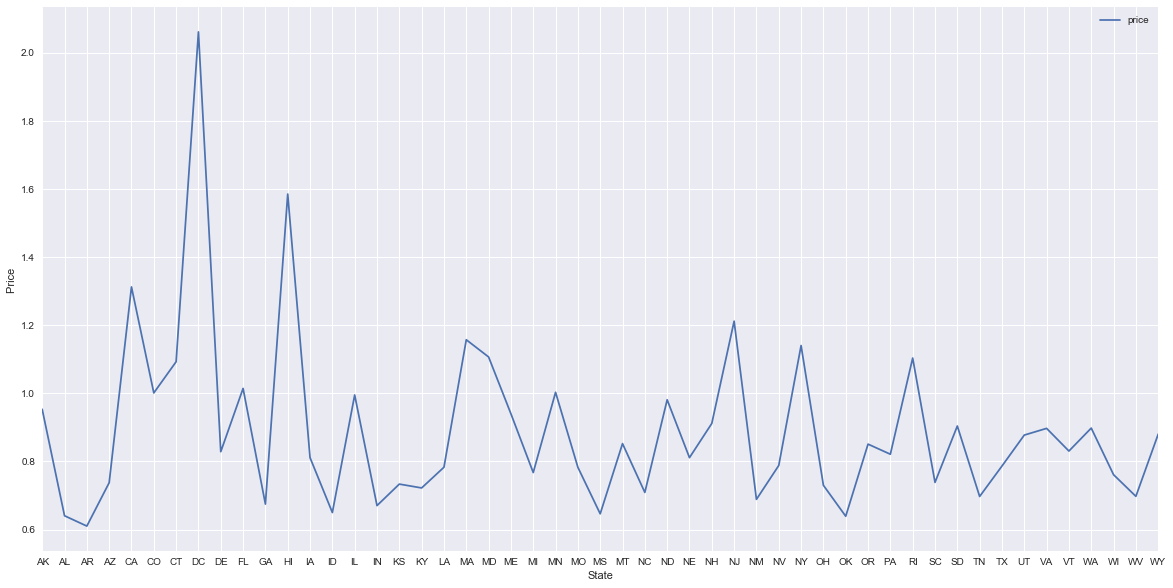

In [8]:

label = meanstate['State']
vals=meanstate['price']
inds=range(len(vals))
ax = meanstate.plot.line('State','price',figsize=(20,10))
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(label)
ax.set_ylabel('Price ')
ax.set_xlabel('State')
sns.despine()

In [9]:
y = x[x['State'] == 'NJ']
y.head()

,State,variable,price
2325,NJ,2010-11-01,1.173696
2326,NJ,2010-12-01,1.178674
2327,NJ,2011-01-01,1.183527
2328,NJ,2011-02-01,1.185835
2329,NJ,2011-03-01,1.186414


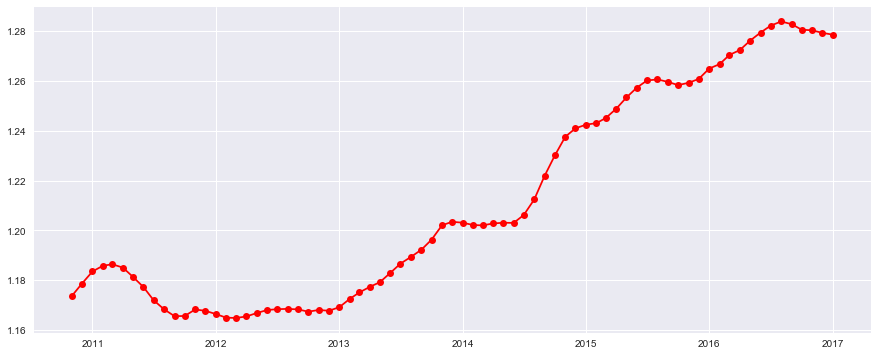

In [10]:
plt.plot(y['variable'],y['price'],'r-o')


In [11]:
import datetime as dt
y['Date'] = pd.to_datetime(y['variable'])
y['Date']=y['Date'].map(dt.datetime.toordinal)

C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
def predict_price(dates,prices,x):
    linear_mod = linear_model.LinearRegression() #defining the linear regression model
    dates = dates.values.reshape(len(dates),1) # converting to matrix of n X 1
    prices = prices.values.reshape(len(prices),1)
    linear_mod.fit(dates,prices) #fitting the data points in the model
    predicted_price =linear_mod.predict(x)
    return predicted_price[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

In [13]:
def show_plot(dates,prices):
    linear_mod = linear_model.LinearRegression()
    dates = dates.values.reshape(len(dates),1) # converting to matrix of n X 1
    prices = prices.values.reshape(len(prices),1)
    linear_mod.fit(dates,prices) #fitting the data points in the model
    plt.scatter(dates,prices,color='yellow') #plotting the initial datapoints 
    plt.plot(dates,linear_mod.predict(dates),color='blue',linewidth=3) #plotting the line made by linear regression
    
    plt.show()
    return

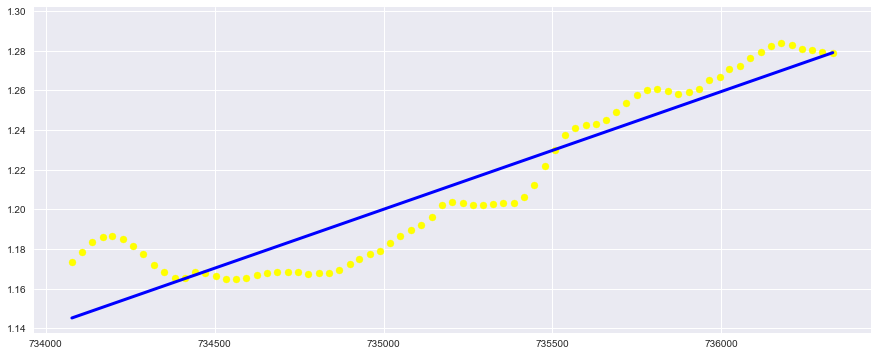

In [14]:
show_plot(y['Date'],y['price']) 

In [15]:
a = dt.datetime.toordinal(pd.to_datetime('2017-02-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for Feb 2017: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2017-03-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for March 2017: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2017-04-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for April 2017: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2017-05-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for May 2017: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2017-06-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for June 2017: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2017-07-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for July 2017: $",str(predicted_price))

Rent Index for New Jersey for Feb 2017: $ 1.2808489267
Rent Index for New Jersey for March 2017: $ 1.28251144981
Rent Index for New Jersey for April 2017: $ 1.2843521004
Rent Index for New Jersey for May 2017: $ 1.28613337517
Rent Index for New Jersey for June 2017: $ 1.28797402576
Rent Index for New Jersey for July 2017: $ 1.28975530053


In [37]:
training = y.iloc[:37]

In [38]:
training.head(100)

,State,variable,price,Date
2325,NJ,2010-11-01,1.173696,734077
2326,NJ,2010-12-01,1.178674,734107
2327,NJ,2011-01-01,1.183527,734138
2328,NJ,2011-02-01,1.185835,734169
2329,NJ,2011-03-01,1.186414,734197
2330,NJ,2011-04-01,1.185081,734228
2331,NJ,2011-05-01,1.181344,734258
2332,NJ,2011-06-01,1.177249,734289
2333,NJ,2011-07-01,1.171978,734319
2334,NJ,2011-08-01,1.168315,734350


In [39]:
a = dt.datetime.toordinal(pd.to_datetime('2013-12-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for Dec 2013: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2014-01-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for Jan 2014: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2014-02-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for Feb 2014: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2014-03-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for March 2014: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2014-04-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for April 2014: $",str(predicted_price))
a = dt.datetime.toordinal(pd.to_datetime('2014-04-01'))
predicted_price, coefficient, constant = predict_price(y['Date'],y['price'],a)  
print("Rent Index for New Jersey for May 2014: $",str(predicted_price))

Rent Index for New Jersey for Dec 2013: $ 1.21209172075
Rent Index for New Jersey for Jan 2014: $ 1.21393237134
Rent Index for New Jersey for Feb 2014: $ 1.21577302193
Rent Index for New Jersey for March 2014: $ 1.21743554505
Rent Index for New Jersey for April 2014: $ 1.21927619564
Rent Index for New Jersey for May 2014: $ 1.21927619564


In [40]:
y.iloc[37:43]

,State,variable,price,Date
2362,NJ,2013-12-01,1.203487,735203
2363,NJ,2014-01-01,1.203128,735234
2364,NJ,2014-02-01,1.202194,735265
2365,NJ,2014-03-01,1.202048,735293
2366,NJ,2014-04-01,1.202813,735324
2367,NJ,2014-05-01,1.203110,735354
